In [82]:
### READ RESULTS INTO PANDAS DATAFRAME
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

resultsdir = "../../../ae-results/"
# list all directories in resultsdir
#configs = [d for d in os.listdir(resultsdir) if os.path.isdir(os.path.join(resultsdir, d))]
configs = ['../results/Baseline.yaml',
            'CoMeT125-3.yaml',
            'CoMeT250-3.yaml',
            'CoMeT500-3.yaml',
            'CoMeT1000-3.yaml',
        ]
# print found configs
print('Found configs: {}'.format(configs))
# list all directories under all configs
workloads = []
for c in configs:
    workloads.append([d for d in os.listdir(os.path.join(resultsdir, c)) if os.path.isdir(os.path.join(resultsdir, c, d))])
# find only the intersection of all workloads
workloads = list(set.intersection(*map(set, workloads)))
# print found workloads
print('Found workloads: {}'.format(workloads))

stats_per_config_workload = []

# for every config + workload directory
for c in configs:
    for w in workloads:
        # find all files in the directory
        files = [f for f in os.listdir(os.path.join(resultsdir, c, w)) if os.path.isfile(os.path.join(resultsdir, c, w, f))]
        # find the stats file
        stat_files = [f for f in files if f.endswith('.stats')]
        # if there is a stats file
        if stat_files:
            for stat_file in stat_files:
                # if the stats_file has less than three lines skip it
                if len(open(os.path.join(resultsdir, c, w, stat_file)).readlines()) < 3:
                    continue
                
                # print the name of the stats_file
                print('Found stats file: {}'.format(os.path.join(os.path.join(resultsdir, c, w, stat_file))))

                extension = ''
                # if stats_file file name itself does not start with DDR4, parse it a bit
                if not stat_file.startswith('DDR4'):
                    # get the config name from the stats_file name
                    extension = '_'.join(stat_file.split('_')[:-1])
                    # prepend underscore to extension
                    extension = '_' + extension

                # read the stats file, name columns: 'name', 'value', 'description'
                df = pd.read_csv(os.path.join(resultsdir, c, w, stat_file), header=None).T
                df.columns = df.iloc[0]
                df.drop(0,inplace=True)
                # add a new column called 'config' with the config name
                df['config'] = c + extension
                # add a new column called 'workload' with the workload name
                df['workload'] = w
                # print the stats file
                # print('Config: {}, Workload: {}, Stats: {}'.format(c, w, df))
                # append the stats to the list
                df.reset_index(inplace=True, drop=True)
                stats_per_config_workload.append(df)
        else:
            print('Config: {}, Workload: {}, Stats: No stats file found'.format(c, w))

# concatenate all stats into one dataframe
stats = pd.concat(stats_per_config_workload)

# find elements where workload does not contain '-'
# these are multi core workloads
stats = stats[~stats['workload'].str.contains('-')]

# remove these two workloads: stream_10.trace and random_10.trace
stats = stats[~stats['workload'].isin(['stream10_200.trace', 'random10_200.trace'])]
# also from workloads
workloads = [w for w in workloads if not w in ['stream10_200', 'random10_200.trace']]

#remove configs that has RH32, AH and AAH in the name
stats = stats[~stats['config'].str.contains('RH32')]
stats = stats[~stats['config'].str.contains('AH')]
stats = stats[~stats['config'].str.contains('AAH')]

# replace 'Baseline' with 'Baseline0'
stats['config'] = stats['config'].str.replace('ae-results/', '')
stats['config'] = stats['config'].str.replace('../results/', '')
stats['config'] = stats['config'].str.replace('Baseline', 'Baseline0')
stats['config'] = stats['config'].str.replace('-4-512-128', '')
stats['config'] = stats['config'].str.replace('-2', '')
stats['config'] = stats['config'].str.replace('-3', '')
stats['config'] = stats['config'].str.replace('-1', '')
stats['config'] = stats['config'].str.replace('-m25', '')

# add a new column that stores in integer the number in the config name
stats['nrh'] = stats['config'].str.extract('(\d+)').astype(int)

# remove numbers from config names
stats['config'] = stats['config'].str.replace('\d+', '')

# remove yaml from config names
stats['config'] = stats['config'].str.replace('.yaml', '')

print(stats['workload'].unique())
stats_copy = stats.copy()


Found configs: ['../results/Baseline.yaml', 'CoMeT125-3.yaml', 'CoMeT250-3.yaml', 'CoMeT500-3.yaml', 'CoMeT1000-3.yaml']
Found workloads: ['tpcc64-tpcc64-tpcc64-tpcc64-tpcc64-tpcc64-tpcc64-tpcc64', '481.wrf-481.wrf-481.wrf-481.wrf-481.wrf-481.wrf-481.wrf-481.wrf', 'h264_encode', 'jp2_encode', '505.mcf-505.mcf-505.mcf-505.mcf-505.mcf-505.mcf-505.mcf-505.mcf', 'bfs_cm2003-bfs_cm2003-bfs_cm2003-bfs_cm2003-bfs_cm2003-bfs_cm2003-bfs_cm2003-bfs_cm2003', '445.gobmk', 'tpcc64', 'wc_8443', '483.xalancbmk', '437.leslie3d', '523.xalancbmk-523.xalancbmk-523.xalancbmk-523.xalancbmk-523.xalancbmk-523.xalancbmk-523.xalancbmk-523.xalancbmk', 'grep_map0', '450.soplex-450.soplex-450.soplex-450.soplex-450.soplex-450.soplex-450.soplex-450.soplex', '444.namd', 'ycsb_bserver-ycsb_bserver-ycsb_bserver-ycsb_bserver-ycsb_bserver-ycsb_bserver-ycsb_bserver-ycsb_bserver', '470.lbm-470.lbm-470.lbm-470.lbm-470.lbm-470.lbm-470.lbm-470.lbm', 'wc_map0-wc_map0-wc_map0-wc_map0-wc_map0-wc_map0-wc_map0-wc_map0', 'ycsb_dse

In [83]:





# use seaborn-deep style
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
sns.set_palette("pastel", n_colors=4)

stats = stats_copy.copy()



# instructions per cycle (IPC) is record_cycles_insts_0 / record_cycs_core_0
stats['ramulator.ipc'] = stats['ramulator.record_insts_core_0'] / stats['ramulator.record_cycs_core_0']


stats['ramulator.rbmpki'] = (stats['ramulator.row_conflicts_channel_0_core'] + stats['ramulator.row_misses_channel_0_core']) /\
                            stats['ramulator.record_insts_core_0'] * 1000


# copy the IPC of the baseline config as to all configs
baseline = stats[stats['config'] == 'Baseline0']
baseline = baseline[['workload', 'ramulator.ipc', 'ramulator.read_latency_avg_0', 'ramulator.rbmpki', 'ramulator.window_full_stall_cycles_core_0']]
# baseline
baseline.columns = ['workload', 'ramulator.baseline_ipc', 'ramulator.baseline_read_latency_avg_0', 'ramulator.baseline_rbmpki', 'ramulator.baseline_stall_cycles']
print('baseline:')
print(baseline)

stats = pd.merge(stats, baseline, on='workload')


#hydra baseline
# hydra_baseline = stats[stats['config'] == 'Hydra-Baseline']
# hydra_baseline = hydra_baseline[['workload', 'ramulator.ipc']]
# # hydra_baseline
# hydra_baseline.columns = ['workload', 'ramulator.hydra_baseline_ipc']
# stats = pd.merge(stats, hydra_baseline, on='workload')

stats['ramulator.normalized_ipc'] = stats['ramulator.ipc'] / stats['ramulator.baseline_ipc']
stats['ramulator.normalized_read_latency'] = stats['ramulator.read_latency_avg_0'] / stats['ramulator.baseline_read_latency_avg_0']
stats['ramulator.normalized_stall_cycles'] = stats['ramulator.window_full_stall_cycles_core_0'] / stats['ramulator.baseline_stall_cycles']
stats['ramulator.normalized_rbmpki'] = stats['ramulator.rbmpki'] / stats['ramulator.baseline_rbmpki']


# normalized ipc for hydra is not correct, so we overwrite it with the correct value
# stats.loc[stats['config'].str.contains('Hydra'), 'ramulator.normalized_ipc'] = stats['ramulator.ipc'] / stats['ramulator.hydra_baseline_ipc']

# add the geometric normalized ipc average as a new workload to every config
geometric_mean = stats.groupby(['config','nrh'])['ramulator.normalized_ipc'].apply(lambda x: x.prod()**(1.0/len(x))).reset_index()
geometric_mean['workload'] = 'GeoMean'

#print(stats['config'])


stats = pd.concat([stats, geometric_mean])
print(stats['config'])
print(stats['workload'])
# print data with workload = GeoMean
print(stats[stats['workload'] == 'bfs_ny'])

baseline:
         workload ramulator.baseline_ipc  \
0     h264_encode               3.998659   
0      jp2_encode               2.409987   
0       445.gobmk               3.723077   
0          tpcc64               2.598011   
0         wc_8443               2.045795   
..            ...                    ...   
0        bfs_dblp               0.254769   
0     538.imagick               3.968639   
0   531.deepsjeng               3.594825   
0         429.mcf               0.509945   
0   507.cactuBSSN               2.437345   

   ramulator.baseline_read_latency_avg_0 ramulator.baseline_rbmpki  \
0                             106.888889                  0.000135   
0                              84.431963                   2.68478   
0                              66.845948                    0.1271   
0                              62.017592                   1.85104   
0                              75.895156                   4.25492   
..                                   ... 

In [84]:
stats_clean = stats.copy()

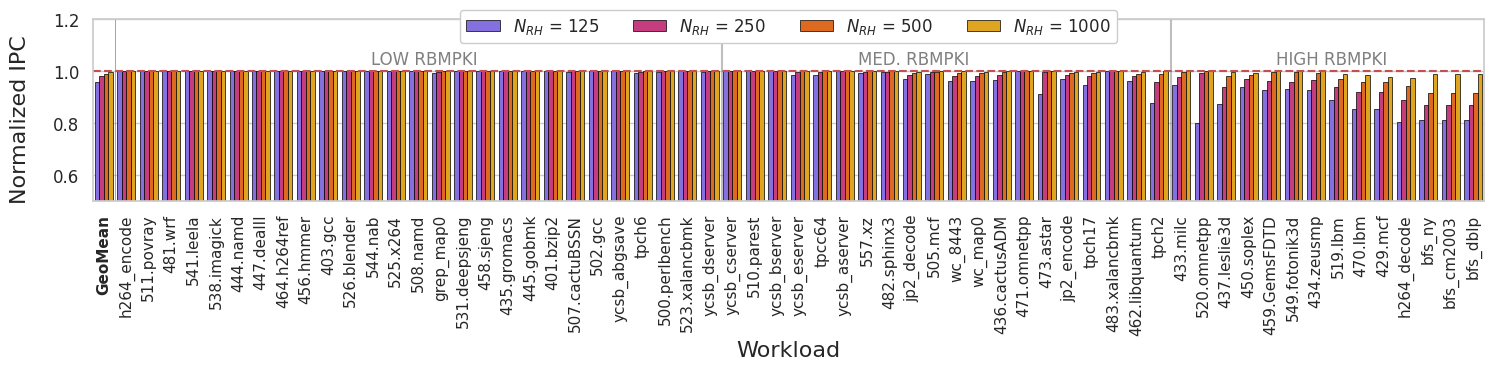

In [85]:
# create a copy of stats with the columns config, workload, normalized_ipc
stats_summary = stats[['config', 'workload', 'ramulator.normalized_ipc','nrh']].copy()
# print to csv fiile
stats_summary.to_csv('single_summary.csv', index=False)

order = ['GeoMean', 'h264_encode', '511.povray', '481.wrf', '541.leela', '538.imagick', '444.namd', '447.dealII', '464.h264ref', '456.hmmer', '403.gcc', '526.blender', '544.nab', '525.x264', '508.namd', 'grep_map0', '531.deepsjeng', '458.sjeng', '435.gromacs', '445.gobmk', '401.bzip2', '507.cactuBSSN', '502.gcc', 'ycsb_abgsave', 'tpch6', '500.perlbench', '523.xalancbmk', 'ycsb_dserver', 'ycsb_cserver', '510.parest', 'ycsb_bserver', 'ycsb_eserver', 'tpcc64', 'ycsb_aserver', '557.xz', '482.sphinx3', 'jp2_decode', '505.mcf', 'wc_8443', 'wc_map0', '436.cactusADM', '471.omnetpp', '473.astar', 'jp2_encode', 'tpch17', '483.xalancbmk', '462.libquantum', 'tpch2', '433.milc', '520.omnetpp', '437.leslie3d', '450.soplex', '459.GemsFDTD', '549.fotonik3d', '434.zeusmp', '519.lbm', '470.lbm', '429.mcf', 'h264_decode', 'bfs_ny', 'bfs_cm2003', 'bfs_dblp']

stats['workload'] = pd.Categorical(stats['workload'], categories=order, ordered=True)

#set color palette
#sns.set_palette("viridis", n_colors=4)

# add comet's palette '#648FFF',
comet_palette = [ '#785EF0', '#DC267F', '#FE6100', '#FFB000']
sns.set_palette(comet_palette, n_colors=4)

#barplot of normalized IPC, also draw edges around bars
fig, ax = plt.subplots(figsize=(15, 4))

ax = sns.barplot(x='workload', y='ramulator.normalized_ipc', hue='nrh', data=stats[
    (stats['config'] != 'Baseline0') 
    ], edgecolor='black', linewidth=0.5)


#stats[(stats['config'] == 'CMS1000-100-c')].to_csv('cms_performance_single_core.csv', index=False)



ax.set_xlabel('Workload')
ax.set_ylabel('Normalized IPC')
# move ylabel down
ax.yaxis.set_label_coords(-0.045,0.45)
# draw a red line at y = 1.0, label it as baseline IPC
ax.axhline(y=1.0, color='r', linestyle='--')
# write above the red line 'baseline IPC' using the same pastel red color
#ax.text(0.01, 0.7, 'baseline IPC', color='#e74c3c', transform=ax.transAxes, fontsize=15)
# extend the y axis to 1.2
ax.set_ylim(0.5, 1.2)
# color the 5th y tick red
#ax.get_yticklabels()[3].set_color('#e74c3c')
# rotate x axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# make axis tick font bigger
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='y', which='major', labelsize=12)

# # draw vertical lines to separate the rowhammer threshold values
ax.axvline(x=27.52, color='grey', linestyle='-', alpha=0.5)
# put text before the line saying "LOW RBMPKI"
ax.text(0.2, 0.75, 'LOW RBMPKI', color='grey', transform=ax.transAxes, fontsize=12)
# put arrow to the left above text
#ax.annotate('', xy=(19.5, 1.04), xytext=(27.5, 1.04), arrowprops=dict(facecolor='grey', shrink=0.01, width=3, headwidth=10, alpha=0.5))
ax.axvline(x=47.52, color='grey', linestyle='-', alpha=0.5)
ax.text(0.55, 0.75, 'MED. RBMPKI', color='grey', transform=ax.transAxes, fontsize=12)
#ax.annotate('', xy=(39.5, 1.04), xytext=(47.5, 1.04), arrowprops=dict(facecolor='grey', shrink=0.01, width=3, headwidth=10, alpha=0.5))
ax.text(0.85, 0.75, 'HIGH RBMPKI', color='grey', transform=ax.transAxes, fontsize=12)
#ax.annotate('', xy=(53.5, 1.04), xytext=(61.5, 1.04), arrowprops=dict(facecolor='grey', shrink=0.01, width=3, headwidth=10, alpha=0.5))
ax.axvline(x=0.5, color='grey', linestyle='-', linewidth=0.5)


# make x and y axis labels bigger
ax.xaxis.label.set_size(16)
#ax.yaxis.label.set_fontweight('bold')
ax.yaxis.label.set_size(16)
#ax.xaxis.label.set_fontweight('bold')

# put the legend on top of the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=False, shadow=False, framealpha=1, fontsize=12)
# prepend "nRH" to legend names
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['$N_{RH}$ = ' + label for label in labels], loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=6, fancybox=True, shadow=False, framealpha=1, fontsize=12)

# highlight the geometric mean ax label
ax.get_xticklabels()[0].set_fontweight('bold')

plt.tight_layout()
plt.show()

# save figure
fig.savefig('comet-singlecore.pdf', bbox_inches='tight')
# export data to csv
stats.to_csv('comet_singlecore.csv', index=False)


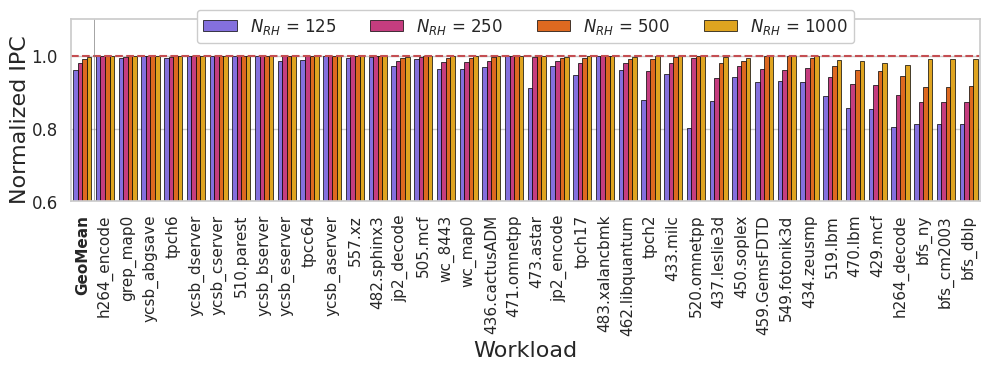

In [86]:
LOW_RBMPKI = ['531.deepsjeng', '502.gcc', '541.leela', '435.gromacs', '481.wrf', '458.sjeng', '445.gobmk', '444.namd', '508.namd', '401.bzip2', '456.hmmer', '403.gcc', '464.h264ref', '526.blender', '447.dealII', '544.nab', '523.xalancbmk', '500.perlbench', '538.imagick', '525.x264', '507.cactuBSSN', '511.povray']
order = ['GeoMean', 'h264_encode', '511.povray', '481.wrf', '541.leela', '538.imagick', '444.namd', '447.dealII', '464.h264ref', '456.hmmer', '403.gcc', '526.blender', '544.nab', '525.x264', '508.namd', 'grep_map0', '531.deepsjeng', '458.sjeng', '435.gromacs', '445.gobmk', '401.bzip2', '507.cactuBSSN', '502.gcc', 'ycsb_abgsave', 'tpch6', '500.perlbench', '523.xalancbmk', 'ycsb_dserver', 'ycsb_cserver', '510.parest', 'ycsb_bserver', 'ycsb_eserver', 'tpcc64', 'ycsb_aserver', '557.xz', '482.sphinx3', 'jp2_decode', '505.mcf', 'wc_8443', 'wc_map0', '436.cactusADM', '471.omnetpp', '473.astar', 'jp2_encode', 'tpch17', '483.xalancbmk', '462.libquantum', 'tpch2', '433.milc', '520.omnetpp', '437.leslie3d', '450.soplex', '459.GemsFDTD', '549.fotonik3d', '434.zeusmp', '519.lbm', '470.lbm', '429.mcf', 'h264_decode', 'bfs_ny', 'bfs_cm2003', 'bfs_dblp']
# remove the workloads that are not in LOW_RBMPKI
order = [x for x in order if not (x in LOW_RBMPKI)]

stats['workload'] = pd.Categorical(stats['workload'], categories=order, ordered=True)

# create a stats copy
stats_reduced = stats.copy()

# remove workloads that are not in MED RBMPKI and HIGH RBMPKI
stats_reduced = stats_reduced[~stats_reduced['workload'].isin(LOW_RBMPKI)]


#set color palette
#sns.set_palette("viridis", n_colors=4)

# add comet's palette '#648FFF',
comet_palette = [ '#785EF0', '#DC267F', '#FE6100', '#FFB000']
sns.set_palette(comet_palette, n_colors=4)

#barplot of normalized IPC, also draw edges around bars
fig, ax = plt.subplots(figsize=(10, 4))

ax = sns.barplot(x='workload', y='ramulator.normalized_ipc', hue='nrh', data=stats_reduced[(stats_reduced['config']!='Baseline0')], edgecolor='black', linewidth=0.5)


#stats[(stats['config'] == 'CMS1000-100-c')].to_csv('cms_performance_single_core.csv', index=False)



ax.set_xlabel('Workload')
ax.set_ylabel('Normalized IPC')
# move ylabel down
ax.yaxis.set_label_coords(-0.045,0.45)
# draw a red line at y = 1.0, label it as baseline IPC
ax.axhline(y=1.0, color='r', linestyle='--')
# write above the red line 'baseline IPC' using the same pastel red color
#ax.text(0.01, 0.7, 'baseline IPC', color='#e74c3c', transform=ax.transAxes, fontsize=15)
# extend the y axis to 1.2
ax.set_ylim(0.6, 1.1)
# color the 5th y tick red
#ax.get_yticklabels()[3].set_color('#e74c3c')
# rotate x axis ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# make axis tick font bigger
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='y', which='major', labelsize=12)

# # draw vertical lines to separate the rowhammer threshold values
#ax.axvline(x=27.52, color='grey', linestyle='-', alpha=0.5)
# put text before the line saying "LOW RBMPKI"
#ax.text(0.2, 0.75, 'LOW RBMPKI', color='grey', transform=ax.transAxes, fontsize=12)
# put arrow to the left above text
#ax.annotate('', xy=(19.5, 1.04), xytext=(27.5, 1.04), arrowprops=dict(facecolor='grey', shrink=0.01, width=3, headwidth=10, alpha=0.5))
#ax.axvline(x=47.52, color='grey', linestyle='-', alpha=0.5)
#ax.text(0.55, 0.75, 'MED. RBMPKI', color='grey', transform=ax.transAxes, fontsize=12)
#ax.annotate('', xy=(39.5, 1.04), xytext=(47.5, 1.04), arrowprops=dict(facecolor='grey', shrink=0.01, width=3, headwidth=10, alpha=0.5))
#ax.text(0.85, 0.75, 'HIGH RBMPKI', color='grey', transform=ax.transAxes, fontsize=12)
#ax.annotate('', xy=(53.5, 1.04), xytext=(61.5, 1.04), arrowprops=dict(facecolor='grey', shrink=0.01, width=3, headwidth=10, alpha=0.5))
ax.axvline(x=0.5, color='grey', linestyle='-', linewidth=0.5)


# make x and y axis labels bigger
ax.xaxis.label.set_size(16)
#ax.yaxis.label.set_fontweight('bold')
ax.yaxis.label.set_size(16)
#ax.xaxis.label.set_fontweight('bold')

# put the legend on top of the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, fancybox=False, shadow=False, framealpha=1, fontsize=12)
# prepend "nRH" to legend names
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['$N_{RH}$ = ' + label for label in labels], loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=6, fancybox=True, shadow=False, framealpha=1, fontsize=12)

# highlight the geometric mean ax label
ax.get_xticklabels()[0].set_fontweight('bold')

plt.tight_layout()
plt.show()

# save figure
fig.savefig('comet-singlecore-reduced.pdf', bbox_inches='tight')
# export data to csv
stats.to_csv('comet_singlecore_reduced.csv', index=False)


In [87]:
print(stats['config'].unique())

['Baseline0' 'CoMeT125' 'CoMeT250' 'CoMeT500' 'CoMeT1000']


In [88]:
stats_copy = stats.copy()

#stats = stats[(stats['workload'] != 'bfs_ny' ) & (stats['workload'] != 'bfs_cm2003' ) & (stats['workload'] != 'bfs_dblp' )]
# print the normalized ipc of CMS for the geomean at nrh=1000
print(1-(stats[(stats['config']=='CoMeT1000') & (stats['nrh']==1000) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']))
print(1-(stats[(stats['config']=='CoMeT1000') & (stats['nrh']==1000)]['ramulator.normalized_ipc'].min()))
print(1-(stats[(stats['config']=='CoMeT125') & (stats['nrh']==125) & (stats['workload']=='GeoMean')]['ramulator.normalized_ipc']))
print(1-(stats[(stats['config']=='CoMeT125') & (stats['nrh']==125)]['ramulator.normalized_ipc'].min()))



print((stats[(stats['config']=='CoMeT1000') & (stats['nrh']==1000)]['ramulator.normalized_read_latency']).mean())
print((stats[(stats['config']=='CoMeT125') & (stats['nrh']==125)]['ramulator.normalized_read_latency']).mean())



stats = stats_copy.copy()


1    0.001904
Name: ramulator.normalized_ipc, dtype: object
0.026487635413201538
2    0.040142
Name: ramulator.normalized_ipc, dtype: object
0.1982126840199625
1.0018642881539466
1.053005952931799
